In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Download the dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


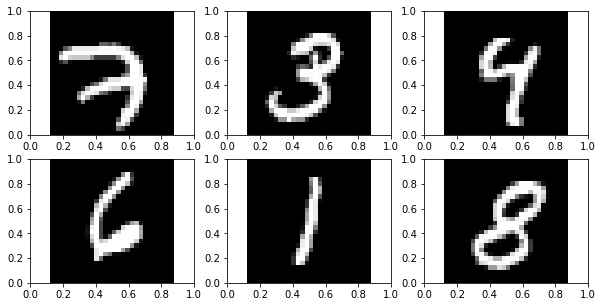

In [2]:
plt.clf()
fig, ax = plt.subplots(2,3,figsize=(10,5))

for i in range(6):
    ax = fig.add_subplot(2, 3, i+1)
    ax.imshow(mnist.train.images[i].reshape(28,28),cmap="gray")
    ax.axis("off")
plt.show()

In [3]:
def get_batches(X,Y,batch_size):
    '''
    Get batches of data, input is features,target
    and batch_size, output is one minibatch
    '''
    iters = X.shape[0]//batch_size
    for i in range(0,iters):
        yield X[i*batch_size:(i+1)*batch_size],Y[i*batch_size:(i+1)*batch_size]

## Neural Network with 3 hidden layers

We define a nerual network with 3 hidden layers of 15 nodes each (exept the last one that has to be 10, the number of classes) that are fully connected.

In [4]:
learning_rate = 0.05 #learning rate, too big will cause NaNs.
batch_size = 10 #size to input the model, max is mnist.train.images.shape[0], the full data
epochs = 200 #number of epochs (times we pass trhough all the training data)
display_step = 5 #every how many steps we display the accuracy

In [5]:
nodes_h1 = 15 #number of nodes first layer
nodes_h2 = 15 #number of nodes second layer
n_classes = 10 #classes

with tf.name_scope('input'):
    X = tf.placeholder(tf.float32, [None, 784],name="X") #input 
    Y = tf.placeholder(tf.float32, [None, 10],name="Y") #true classification

with tf.name_scope('parameters'):
    W_hidden_1 = tf.Variable(tf.random_normal([784,nodes_h1], name ="W1")) 
    b_hidden_1 = tf.Variable(tf.random_normal([nodes_h1]),name="b1")

    W_hidden_2 = tf.Variable(tf.random_normal([nodes_h1,nodes_h2], name ="W2"))
    b_hidden_2 = tf.Variable(tf.random_normal([nodes_h2]),name="b2")
                             
    W_output = tf.Variable(tf.random_normal([nodes_h2,n_classes]),name="W_output")
    b_output = tf.Variable(tf.random_normal([n_classes]),name="b_output")
                             
layer_1 = tf.nn.softmax(tf.matmul(X, W_hidden_1) + b_hidden_1)
layer_2 = tf.nn.softmax(tf.matmul(layer_1, W_hidden_2) + b_hidden_2)

with tf.name_scope('prediction'):
    y = tf.nn.softmax(tf.matmul(layer_2, W_output) + b_output)

#the error to minimize is the cross_entropy
cross_entropy = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(y), reduction_indices=[1]))

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#train the nn with simple gradient descent
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

#saver
saver = tf.train.Saver()

#to show in tensorboard
summary_acc = tf.summary.scalar(name="acc",tensor=accuracy)

In [6]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    writer = tf.summary.FileWriter("./tmp", graph=sess.graph)
    for epoch in range(epochs):
        data = get_batches(X=mnist.train.images,Y=mnist.train.labels,batch_size=batch_size)
        for x_,y_ in data:
            sess.run(train_step,feed_dict = {X:x_,Y:y_})
        
        if epoch % display_step == 0:
            print("epoch: {}, accuracy:{}, cross_entropy:{}".format(epoch,
                sess.run(accuracy,feed_dict={X:mnist.test.images,Y:mnist.test.labels}),
                sess.run(cross_entropy,feed_dict = {X:mnist.test.images,Y:mnist.test.labels})))
            
        summary = sess.run(summary_acc,feed_dict={Y : mnist.train.labels,X : mnist.train.images})
        writer.add_summary(summary, epoch)
        
    save_path = saver.save(sess, "./tmp/neural_network_model.ckpt")
    print("Model saved in path: {}".format(save_path))


epoch: 0, accuracy:0.35530000925064087, cross_entropy:1.6375553607940674
epoch: 5, accuracy:0.5597000122070312, cross_entropy:1.0829017162322998
epoch: 10, accuracy:0.7307000160217285, cross_entropy:0.7259600758552551
epoch: 15, accuracy:0.7524999976158142, cross_entropy:0.6786924004554749
epoch: 20, accuracy:0.7712000012397766, cross_entropy:0.6719315648078918
epoch: 25, accuracy:0.7906000018119812, cross_entropy:0.6145690679550171
epoch: 30, accuracy:0.798799991607666, cross_entropy:0.5906968712806702
epoch: 35, accuracy:0.7978000044822693, cross_entropy:0.5883212685585022
epoch: 40, accuracy:0.7979999780654907, cross_entropy:0.5889756679534912
epoch: 45, accuracy:0.7950000166893005, cross_entropy:0.5999442338943481
epoch: 50, accuracy:0.7929999828338623, cross_entropy:0.6034144163131714
epoch: 55, accuracy:0.7964000105857849, cross_entropy:0.5988724827766418
epoch: 60, accuracy:0.7964000105857849, cross_entropy:0.6042076349258423
epoch: 65, accuracy:0.8048999905586243, cross_entropy

## Neural net of 2 layers 

This neural net achieved an error of 1.6 according to [this article](https://en.wikipedia.org/wiki/MNIST_database). 2-layer 784-800-10. But here we need a lot of steps to train and get this small error, we will not run so many epochs. Besides this structure has more parameters (800 actually) than the nn of 3 layers.

In [7]:
learning_rate = 0.05 #learning rate, too big will cause NaNs.
batch_size = 10 #size to input the model, max is mnist.train.images.shape[0], the full data
epochs = 200 #number of epochs (times we pass trhough all the training data)
display_step = 5 #every how many steps we display the accuracy

In [8]:
nodes_h1 = 800 #number of nodes first layer
n_classes = 10 #classes

with tf.name_scope('input'):
    X = tf.placeholder(tf.float32, [None, 784],name="X")
    Y = tf.placeholder(tf.float32, [None, 10],name="Y")

with tf.name_scope('parameters'):
    W_hidden_1 = tf.Variable(tf.random_normal([784,nodes_h1], name ="W1"))
    b_hidden_1 = tf.Variable(tf.random_normal([nodes_h1]),name="b1")
                          
    W_output = tf.Variable(tf.random_normal([nodes_h1,n_classes]),name="W_output")
    b_output = tf.Variable(tf.random_normal([n_classes]),name="b_output")
                             
layer_1 = tf.nn.softmax(tf.matmul(X, W_hidden_1) + b_hidden_1)

with tf.name_scope('prediction'):
    y = tf.nn.softmax(tf.matmul(layer_1, W_output) + b_output)
    
#the error to minimize is the cross_entropy
cross_entropy = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(y), reduction_indices=[1]))

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#train the nn with simple gradient descent
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

#saver
saver = tf.train.Saver()

#to show in tensorboard
summary_acc = tf.summary.scalar(name="acc",tensor=accuracy)

In [9]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    writer = tf.summary.FileWriter("./tmp", graph=sess.graph)
    for epoch in range(epochs):
        data = get_batches(X=mnist.train.images,Y=mnist.train.labels,batch_size=batch_size)
        for x_,y_ in data:
            sess.run(train_step,feed_dict = {X:x_,Y:y_})
        
        if epoch % display_step == 0:
            print("epoch: {}, accuracy:{}, cross_entropy:{}".format(epoch,
                sess.run(accuracy,feed_dict={X:mnist.test.images,Y:mnist.test.labels}),
                sess.run(cross_entropy,feed_dict = {X:mnist.test.images,Y:mnist.test.labels})))
            
        summary = sess.run(summary_acc,feed_dict={Y : mnist.train.labels,X : mnist.train.images})
        writer.add_summary(summary, epoch)
        
    save_path = saver.save(sess, "./tmp/neural_network_model.ckpt")
    print("Model saved in path: {}".format(save_path))


epoch: 0, accuracy:0.572700023651123, cross_entropy:1.1352640390396118
epoch: 5, accuracy:0.8169000148773193, cross_entropy:0.5566388964653015
epoch: 10, accuracy:0.8356999754905701, cross_entropy:0.4961489140987396
epoch: 15, accuracy:0.847100019454956, cross_entropy:0.4736345708370209
epoch: 20, accuracy:0.8758999705314636, cross_entropy:0.43066534399986267
epoch: 25, accuracy:0.8736000061035156, cross_entropy:0.42929980158805847
epoch: 30, accuracy:0.8772000074386597, cross_entropy:0.4220755398273468
epoch: 35, accuracy:0.8758999705314636, cross_entropy:0.42586392164230347
epoch: 40, accuracy:0.8787000179290771, cross_entropy:0.42259687185287476
epoch: 45, accuracy:0.8797000050544739, cross_entropy:0.42229726910591125
epoch: 50, accuracy:0.8837000131607056, cross_entropy:0.4152168035507202
epoch: 55, accuracy:0.8881999850273132, cross_entropy:0.40752679109573364
epoch: 60, accuracy:0.8884999752044678, cross_entropy:0.4076586365699768
epoch: 65, accuracy:0.8895000219345093, cross_ent